In [5]:
#libraries 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabonrInstance
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import Lasso

In [12]:
veri = pd.read_excel('SATILIK_EV1.xlsx')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [16]:
X = veri.drop(["Fiyat"],axis=1)
y = veri['Fiyat']

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   test_size=0.2)

In [22]:
# Train
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_ != 0)

In [23]:
print('eğtim verisi için R2:', train_score)
print('test verisi için R2:',test_score)
print('Öznitelik sayisi(Ağirliği sifirdan buyuk):', coeff_used)

eğtim verisi için R2: 0.7984550147674687
test verisi için R2: 0.752941145053781
Öznitelik sayisi(Ağirliği sifirdan buyuk): 4


In [27]:
lasso001 = Lasso(alpha=0.01, max_iter= 10**5)
lasso001.fit(X_train,y_train)

train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)
coeff_used001= np.sum(lasso001.coef_ !=0)


In [28]:
print('eğtim verisi için R2:', train_score001)
print('test verisi için R2:',test_score001)
print('Öznitelik sayisi(Ağirliği sifirdan buyuk):', coeff_used001)

eğtim verisi için R2: 0.801276821503058
test verisi için R2: 0.7483964045614071
Öznitelik sayisi(Ağirliği sifirdan buyuk): 5


In [29]:
# Lasso(alpha = 0.001)
lasso0001 = Lasso(alpha= 0.001,max_iter= 10**5)
lasso0001.fit(X_train,y_train)

train_score0001 = lasso0001.score(X_train,y_train)
test_score0001 = lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_ != 0)

In [30]:
print('eğtim verisi için R2:', train_score0001)
print('test verisi için R2:',test_score0001)
print('Öznitelik sayisi(Ağirliği sifirdan buyuk):', coeff_used0001)

eğtim verisi için R2: 0.8012771867889114
test verisi için R2: 0.748329799472431
Öznitelik sayisi(Ağirliği sifirdan buyuk): 5


In [31]:
# LR ile karşılaştır
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print('Eğitim R2 :', lr_train_score)
print('Test R2:', lr_test_score)

Eğitim R2 : 0.8012771904786502
Test R2: 0.7483223751942699


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

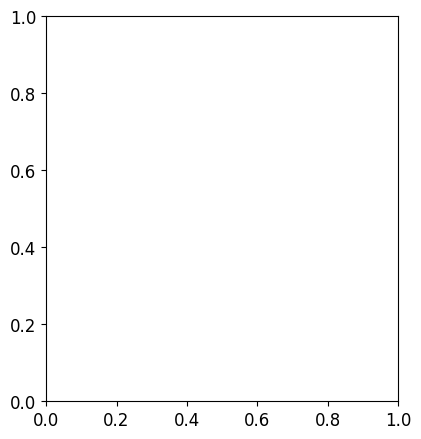

In [34]:
# grafik
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((1,2,3,4), lr.coef_,alpha = 0.7, linestyle = 'none',
         marker = 'o', markersize = 15, color = 'orange',label = 'Doğrusal Reg', zorder = 2)
plt.plot((1,2,3,4), lasso.coef_,alpha = 1, linestyle = 'none',
         marker = 'x', markersize = 10, color = 'black',label = 'Lasso; $\alpha = 1$', zorder = 7)
plt.plot(0,lr.intercept_,alpha = 0.7,linestyle = 'none',marker = 'o',markersize = 15,
         color = 'orange')
plt.plot(0,lasso.intercept_,alpha = 1,linestyle = 'none',marker = 'x',markersize = 10,
         color = 'black')

### LASSO(Vahit)

In [38]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                 random_state= 42)

In [39]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)
lasso_model

c:\Users\uurce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [40]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

c:\Users\uurce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\uurce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\uurce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Text(0, 0.5, 'weights')

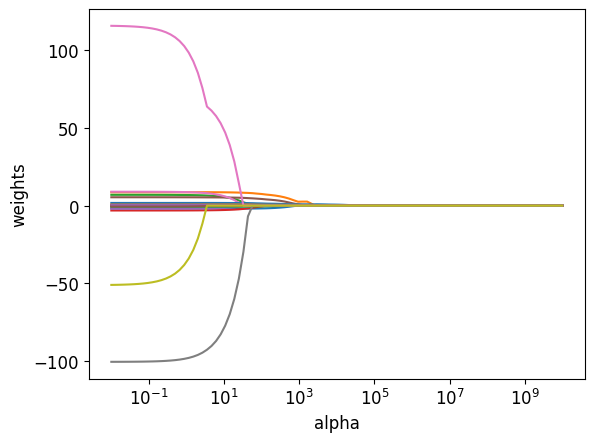

In [44]:
lasso = Lasso()
lambdalar = 10** np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train,y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [47]:
#Tahmin
y_pred = lasso_model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

356.7545270148771

In [53]:
# Model tuninng
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas= None,cv = 10,max_iter=10000).fit(X_train,y_train)

In [54]:
lasso_cv_model.alpha_

563.4670501833854

In [56]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_)
lasso_tuned.fit(X_train,y_train)

y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069795